In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Hide Warnings
pd.options.mode.chained_assignment = None

# Intelligent-Data-Analysis-Project

by Lucas Hoeft

In [65]:
# http://archive.ics.uci.edu/ml/datasets/Wine
wines = pd.read_csv('data/wine/wine.data', sep=",", na_values="NA", header=None)
wines.columns = ["Class",
                 "Alcohol", 
                 "Malic acid", 
                 "Ash",
                 "Alcalinity of ash",
                 "Magnesium",
                 "Total phenols",
                 "Flavanoids",
                 "Nonflavanoid phenols",
                 "Proanthocyanins",
                 "Color intensity",
                 "Hue",
                 "OD280/OD315 of diluted wines",
                 "Proline"]
print(wines.shape)
wines.head()

(178, 14)


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
# http://archive.ics.uci.edu/ml/datasets/Wine+Quality 
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
wines_quality_red = pd.read_csv('data/wine-quality/winequality-red.csv', sep=";", na_values="NA")
print(wines_quality_red.shape)
display(wines_quality_red.head())

wines_quality_white = pd.read_csv('data/wine-quality/winequality-white.csv', sep=";", na_values="NA")
print(wines_quality_white.shape)
wines_quality_white.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


[[8.28699634e+00 5.20503663e-01 2.72435897e-01 2.49706960e+00
  9.13095238e-02 2.15705128e+01 5.48882784e+01 9.96855769e-01
  3.32020147e+00 6.77106227e-01 1.03768010e+01 5.62820513e+00]
 [7.88755187e+00 5.72365145e-01 2.75643154e-01 3.23236515e+00
  8.83983402e-02 2.61514523e+01 1.08506224e+02 9.96934730e-01
  3.28962656e+00 6.52033195e-01 1.00089212e+01 5.30705394e+00]
 [8.46982759e+00 5.19519704e-01 2.68608374e-01 2.36102217e+00
  8.46059113e-02 8.99507389e+00 2.23928571e+01 9.96617512e-01
  3.31137931e+00 6.47216749e-01 1.05769294e+01 5.73891626e+00]]
[0 2 2 ... 2 2 2]


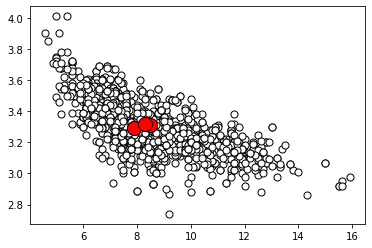

In [76]:
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(wines_quality)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(wines_quality)

print(y_km)

# plot the input data
X = wines_quality.to_numpy()
plt.scatter(X[:, 0], X[:, 8], c='white', marker='o', edgecolor='black', s=50)
# plot the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 8], c='red', marker='o', edgecolor='black', s=200)
plt.show()

In [77]:
wines_quality_red['type'] = "red"
wines_quality_white['type'] = "white"
wines_quality_all = pd.concat([wines_quality_red, wines_quality_white], axis=0)
print(wines_quality_all.shape)
wines_quality_all.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


[[7.21530706e+00 3.39666000e-01 3.18633215e-01 5.44323534e+00
  5.60338618e-02 3.05253194e+01 1.15744574e+02 9.94696634e-01
  3.21850085e+00 5.31268278e-01 1.04918008e+01 5.81837771e+00]]
[0 0 0 ... 0 0 0]


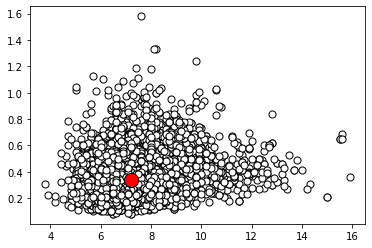

In [91]:
# create kmeans object
# wines_quality_all.drop(columns=['type'], axis=1, inplace=True)

kmeans = KMeans(n_clusters=1)
# fit kmeans object to data
kmeans.fit(wines_quality_all)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(wines_quality_all)

print(y_km)

# plot the input data
X = wines_quality_all.to_numpy()
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
# plot the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', edgecolor='black', s=200)
plt.show()